### Aim:
Exercises for Model selection and evaluation using Cross Validation

### Objective:
Evaluate four ML models on the Iris dataset using cross-validation. Compare performance based on accuracy and standard deviation. Conduct hyperparameter tuning using GridSearchCV to find optimal settings. Select the best-performing model and report its hyperparameters.

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris_data = pd.read_csv('Iris_data.csv')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sepal Length vs Sepal Width by Species')

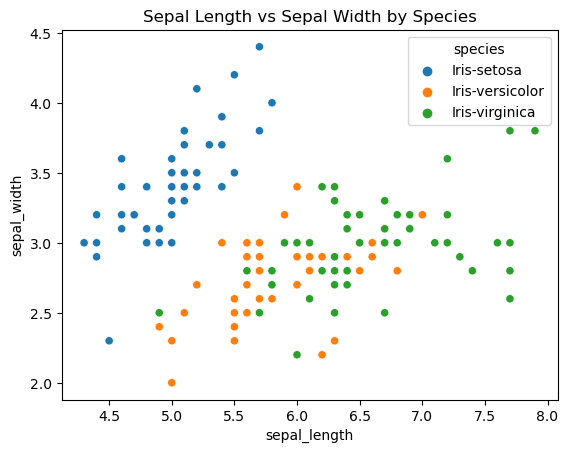

In [5]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_data)
plt.title('Sepal Length vs Sepal Width by Species')

In [6]:
iris_data['species'] = iris_data['species'].str.replace('Iris-',"")

In [7]:
X = iris_data.drop(columns='species', axis=1)
Y = iris_data['species']

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
models = [LogisticRegression(max_iter=10000), SVC(kernel='linear'), 
          KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [10]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [11]:
def compare_models_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, X, Y, cv=6, scoring='accuracy')
        print(model,cv_score)

In [12]:
model_hyperparameters = {
    'log_reg_hyperparameters': {'C': [0.1, 1, 5, 10, 20]},
    'svc_hyperparameters': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 5, 10, 20], 'gamma': ['scale', 'auto']},
    'KNN_hyperparameters': {'n_neighbors': [3, 5, 10, 15, 20]},
    'random_forest_hyperparameters': {'n_estimators': [10, 20, 50, 100, 200]}
}

In [19]:
def ModelSelection(list_of_models, hyperparameters_dictionary):
    result = []
    model_keys = list(hyperparameters_dictionary.keys())
    for model in list_of_models:
        key = model_keys[list_of_models.index(model)]
        params = hyperparameters_dictionary[key]
        classifier = GridSearchCV(model, params, cv=5, scoring='accuracy')
        classifier.fit(X, Y)
        result.append({
            'model used': type(model).__name__,
            'highest score': classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })
    result_dataframe = pd.DataFrame(result)
    return result_dataframe

In [20]:
compare_models_cross_validation()

LogisticRegression(max_iter=10000) [0.96 1.   0.96 0.92 0.96 1.  ]
SVC(kernel='linear') [0.96 1.   0.96 0.96 1.   1.  ]
KNeighborsClassifier() [0.96 1.   0.92 0.92 1.   1.  ]
RandomForestClassifier(random_state=0) [0.96 1.   0.92 0.92 0.92 1.  ]


In [21]:
ModelSelection(models, model_hyperparameters)

,model used,highest score,best hyperparameters
0,LogisticRegression,0.980000,{'C': 20}
1,SVC,0.986667,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}"
2,KNeighborsClassifier,0.980000,{'n_neighbors': 10}
3,RandomForestClassifier,0.966667,{'n_estimators': 100}
